In [229]:
import numpy as np
import matplotlib.pyplot as plt

In [214]:
Lx        = 0.5
num_nodes = 5
del_x     = Lx / num_nodes
k         = 1000
A         = 0.01

T_A       = 100
T_B       = 500

In [215]:
node_lengths = [del_x] * num_nodes
node_lengths

[0.1, 0.1, 0.1, 0.1, 0.1]

In [216]:
half_length = [i/2 for i in node_lengths]
half_length

[0.05, 0.05, 0.05, 0.05, 0.05]

In [217]:
PE_WP = []
for i in range(len(half_length)):
    if i == 0:
        PE_WP.append([half_length[i], half_length[i] + half_length[i+1]])
    elif i == len(half_length)-1:
        PE_WP.append([half_length[i] + half_length[i-1], half_length[i]])
    else:
        PE_WP.append([half_length[i] + half_length[i-1], half_length[i] + half_length[i+1]])

In [218]:
PE_WP

[[0.05, 0.1], [0.1, 0.1], [0.1, 0.1], [0.1, 0.1], [0.1, 0.05]]

In [219]:
def coef_generator(k, del_PE, del_WP, idx):
    node_num = idx + 1

    ap = ((k/del_PE)*A) + ((k/del_WP)*A)
    aw =  (k/del_WP)*A
    ae =  (k/del_PE)*A

    return (ap, idx), (aw, idx - 1), (ae, idx + 1)

coef_matrix = []
for del_distances_idx in range(len(PE_WP)):
    coef_matrix.append(coef_generator(
                            k,
                            del_PE = PE_WP[del_distances_idx][1],
                            del_WP = PE_WP[del_distances_idx][0],
                            idx    = del_distances_idx
                            )
                        )

In [220]:
matrix_A = np.zeros((len(PE_WP), len(PE_WP)))
matrix_A

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [221]:
matrix_B = np.zeros((len(PE_WP)))
matrix_B

array([0., 0., 0., 0., 0.])

In [222]:
coef_matrix

[((300.0, 0), (200.0, -1), (100.0, 1)),
 ((200.0, 1), (100.0, 0), (100.0, 2)),
 ((200.0, 2), (100.0, 1), (100.0, 3)),
 ((200.0, 3), (100.0, 2), (100.0, 4)),
 ((300.0, 4), (100.0, 3), (200.0, 5))]

In [223]:
matrix_A = np.zeros((len(PE_WP), len(PE_WP)))
matrix_B = np.zeros((len(PE_WP)))

for i_idx, i in enumerate(coef_matrix):
    for j_idx, j in enumerate(i):
        if j[1] == -1 :
            matrix_B[i_idx] = j[0] * T_A
        elif j[1] == len(PE_WP):
            matrix_B[i_idx] = j[0] * T_B
        else:
            if i_idx != j[1]:
                matrix_A[i_idx][j[1]] = j[0] * -1
            else:
                matrix_A[i_idx][j[1]] = j[0]
            
matrix_B

array([ 20000.,      0.,      0.,      0., 100000.])

In [224]:
matrix_A

array([[ 300., -100.,    0.,    0.,    0.],
       [-100.,  200., -100.,    0.,    0.],
       [   0., -100.,  200., -100.,    0.],
       [   0.,    0., -100.,  200., -100.],
       [   0.,    0.,    0., -100.,  300.]])

In [225]:
X = np.zeros(len(matrix_B))

In [226]:
def Gauss_Sadel(A, B, X, tolerance):
    relative_error = np.inf
    loops_taken = 0

    while relative_error > tolerance:
        X_old = X.copy()
        for j in range(len(A)):
            sum = 0
            for i in range(len(A)):
                if i != j:
                    sum += A[j][i] * X[i]
            X[j] = (B[j] - sum) / A[j][j]

        relative_error = np.max(np.abs(X - X_old) / (np.abs(X) + 1e-9))
        loops_taken += 1

    return X, loops_taken
X, loops_taken = Gauss_Sadel(matrix_A, matrix_B, X, tolerance = 1e-12)

In [227]:
X

array([140., 220., 300., 380., 460.])

In [228]:
loops_taken

69

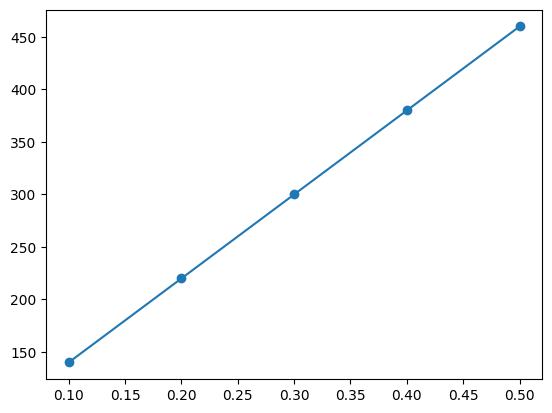

In [232]:
plt.plot(np.cumsum(node_lengths), X, marker='o')